# Welcome to the CILAS grain size processing script!

### <div style="text-align: right"> Last modified by A.A. Lehrmann 22 November 2024 </div>


### The script below will extract .MES data, process the bin sizes, and plot the grain size distribuiton curves

### Important instructions before you begin:

    1. NEVER edit raw data. Do not delete .MES files. 
    
    2. Make an /CORE_GrainsizeOutput/ folder to put all of your script's outputs, and a /CORE_GrainsizeProcessed/ folder to put your script's processed data

    3. When copying folder paths, make sure to remove quotation marks

    4. Always add the extension .csv to your output files

# Convert .MES files to .csv 


In [2]:
import os
import csv

def process_mes_file(input_file):
    output_rows = []
    with open(input_file, 'r') as file:
        lines = file.readlines()
        core_name = lines[4].strip()
        date = lines[53].strip()

        # Process um values
        um_values = lines[45:144]
        um_values = [float(value.strip()) for value in um_values]

        # Process percent values
        percent_values = lines[145:244]
        percent_values = [float(value.strip()) for value in percent_values]

        # Calculate individual percentages
        indiv_perc = [percent_values[0]]  # First value remains the same
        for i in range(1, len(percent_values)):
            indiv_perc.append(percent_values[i] - percent_values[i - 1])

        # Zip the data together
        for um, percent, indiv_percent in zip(um_values, percent_values, indiv_perc):
            output_rows.append([core_name, date, um, percent, indiv_percent])

    return output_rows

def write_to_csv(output_file, rows):
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Core name", "Date", "um", "percent", "indiv perc"])
        writer.writerows(rows)

def process_folder(folder_path, output_folder):
    for filename in os.listdir(folder_path):
        if filename.endswith('.MES'):
            input_file = os.path.join(folder_path, filename)
            output_file = os.path.join(output_folder, os.path.splitext(filename)[0] + '.csv')
            rows = process_mes_file(input_file)
            write_to_csv(output_file, rows)
            print(f"Processed {filename} and saved as {output_file}")

# Ask the user for the input and output folder paths
input_folder = input("Enter the path to the input folder (e.g., /path/to/input_folder): ")
output_folder = input("Enter the path to the output folder (e.g., /path/to/output_folder): ")

# Process the folder
process_folder(input_folder, output_folder)


Enter the path to the input folder (e.g., /path/to/input_folder):  D:\JamieGS
Enter the path to the output folder (e.g., /path/to/output_folder):  D:\JamieGS\output


Processed NBP1203_JC21_1047.5-1048.MES and saved as D:\JamieGS\output\NBP1203_JC21_1047.5-1048.csv
Processed NBP1203_JC21_1048-1048.5.MES and saved as D:\JamieGS\output\NBP1203_JC21_1048-1048.5.csv
Processed NBP1203_JC21_1048.5-1049.MES and saved as D:\JamieGS\output\NBP1203_JC21_1048.5-1049.csv
Processed NBP1203_JC21_1049-1049.5.MES and saved as D:\JamieGS\output\NBP1203_JC21_1049-1049.5.csv
Processed NBP1203_JC21_1049.5-1050.MES and saved as D:\JamieGS\output\NBP1203_JC21_1049.5-1050.csv
Processed NBP1203_JC21_1052.25-1052.5.MES and saved as D:\JamieGS\output\NBP1203_JC21_1052.25-1052.5.csv
Processed NBP1203_JC21_1052.5-1052.75.MES and saved as D:\JamieGS\output\NBP1203_JC21_1052.5-1052.75.csv
Processed NBP1203_JC21_1052.75-1053.MES and saved as D:\JamieGS\output\NBP1203_JC21_1052.75-1053.csv
Processed NBP1203_JC21_1053-1053.25.MES and saved as D:\JamieGS\output\NBP1203_JC21_1053-1053.25.csv
Processed NBP1203_JC21_1053.25-1053.5.MES and saved as D:\JamieGS\output\NBP1203_JC21_1053.25

# To double check the conversion worked correctly, check the D50 of the csv

In [3]:
import pandas as pd
import numpy as np

# Ask the user for the input file path
input_file_path = input("Please enter the path to the CSV file: ")

# Ask the user for the percentile to calculate
percentile = float(input("Please enter the percentile to calculate (e.g., 50 for the 50th percentile): "))

# Load the CSV file
data = pd.read_csv(input_file_path)

# Sort the data by grain size (um)
data = data.sort_values('um').reset_index(drop=True)

# Calculate the cumulative percentage from the 'percent' column (percent * 100)
data['Cumulative (%)'] = data['percent'] * 100  # Multiply percent by 100 to get cumulative %

# Print the entire table of grain sizes and their cumulative percentages
print("Complete Cumulative Percentage Table:")
print(data[['um', 'percent', 'Cumulative (%)']])

# Find the grain size at the requested percentile
grain_size_percentile = data.loc[data['Cumulative (%)'] >= percentile, 'um']

if not grain_size_percentile.empty:
    grain_size_value = grain_size_percentile.iloc[0]
    print(f"\nThe grain size at the {percentile}th percentile is approximately {grain_size_value:.2f} microns.")
else:
    print(f"No grain size found for the {percentile}th percentile.")


Please enter the path to the CSV file:  D:\JamieGS\output\NBP1203_JC21_13.5-14.5.csv
Please enter the percentile to calculate (e.g., 50 for the 50th percentile):  50


Complete Cumulative Percentage Table:
         um  percent  Cumulative (%)
0      0.07   0.0008            0.08
1      0.10   0.0008            0.08
2      0.20   0.0020            0.20
3      0.30   0.0039            0.39
4      0.40   0.0050            0.50
..      ...      ...             ...
94  2100.00   1.0000          100.00
95  2200.00   1.0000          100.00
96  2300.00   1.0000          100.00
97  2400.00   1.0000          100.00
98  2500.00   1.0000          100.00

[99 rows x 3 columns]

The grain size at the 50.0th percentile is approximately 56.00 microns.


# Individiual sample: Process the grain size data and plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc  # Import the cmcrameri colormap

# Ask the user for input file path and output file path
input_file_path = input("Enter the path to the input CSV file: ")  # Prompt user for input file path
output_file_path = input("Enter the name of the output CSV file (e.g., 'output_file12.csv'): ")  # Prompt user for output file name

# Read the data
data = pd.read_csv(input_file_path)

# Initialize new columns
data['Cumulative (%) Q3'] = 0.0
data['Computation'] = 0.0

# Calculate Cumulative (%) Q3 for each row
for i in range(len(data)):
    data.loc[i, 'Cumulative (%) Q3'] = data.loc[i, 'percent'] * 100  # Percent * 100 to get the cumulative percentage

# Calculate Computation for each row
for i in range(2, len(data)):  # Start from row 3
    data.loc[i, 'Computation'] = (data.loc[i, 'Cumulative (%) Q3'] - data.loc[i-1, 'Cumulative (%) Q3']) / np.log(data.loc[i, 'um'] / data.loc[i-1, 'um'])

# Calculate Total Computation
data['Total Computation'] = data['Computation'].sum()

# Calculate Histogram (%) q3
data['Histogram (%) q3'] = (data['Computation'] / data['Total Computation']) * 100

# Plotting
plt.figure(figsize=(10, 6))

# Create the first axis for Cumulative (%) Q3
ax1 = plt.gca()
ax1.plot(data['um'], data['Cumulative (%) Q3'], linestyle='-', color=cmc.batlow(0.8), linewidth=2, label='Cumulative (%) Q3')
ax1.set_xscale('log')  # Set x-axis to logarithmic scale
ax1.set_ylabel('Cumulative (%) Q3', fontsize=14, color=cmc.batlow(0.8))
ax1.tick_params(axis='y', labelcolor=cmc.batlow(0.8))

# Create a second y-axis for Histogram (%) q3
ax2 = ax1.twinx()
ax2.plot(data['um'], data['Histogram (%) q3'], linestyle='-', color=cmc.batlow(0.5), linewidth=2, label='Histogram (%) q3')
ax2.set_ylabel('Histogram (%) q3', fontsize=14, color=cmc.batlow(0.5))
ax2.tick_params(axis='y', labelcolor=cmc.batlow(0.5))

# Common x-axis label and title
plt.xlabel('Grain Size (µm)', fontsize=14)
plt.title('Cumulative (%) Q3 and Histogram (%) q3 vs. Grain Size', fontsize=16)
plt.grid(True, which='both', ls='--', linewidth=0.5)

# Show legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Tight layout
plt.tight_layout()

# Save the plot
plt.savefig('cumulative_and_histogram_vs_grain_size.png')  # Save as a PNG file
plt.show()  # Display the plot

# Save the updated DataFrame to a new CSV file
data.to_csv(output_file_path, index=False)
print('Calculations completed, plot saved, and data exported to', output_file_path)


# Plots for a folder of grain size data

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc  # Import the cmcrameri colormap

# Ask the user for the folder path containing input CSV files and output folder
input_folder_path = input("Enter the path to the folder containing input CSV files: ").strip()
output_folder_path = input("Enter the path to the folder to save processed files: ").strip()

# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

# Get all CSV files in the input folder
csv_files = [f for f in os.listdir(input_folder_path) if f.endswith('.csv')]

# Process each CSV file in the folder
for file_name in csv_files:
    input_file_path = os.path.join(input_folder_path, file_name)
    output_file_name = f"processed_{file_name}"
    output_file_path = os.path.join(output_folder_path, output_file_name)
    output_plot_path = os.path.join(output_folder_path, f"{file_name.replace('.csv', '')}_plot.png")
    
    # Read the data
    data = pd.read_csv(input_file_path)

    # Check if required columns are present
    if 'um' in data.columns and 'percent' in data.columns:
        # Initialize new columns
        data['Cumulative (%) Q3'] = 0.0
        data['Computation'] = 0.0

        # Calculate Cumulative (%) Q3 for each row
        for i in range(len(data)):
            data.loc[i, 'Cumulative (%) Q3'] = data.loc[i, 'percent'] * 100  # Percent * 100 to get the cumulative percentage

        # Calculate Computation for each row
        for i in range(2, len(data)):  # Start from row 3
            data.loc[i, 'Computation'] = (data.loc[i, 'Cumulative (%) Q3'] - data.loc[i-1, 'Cumulative (%) Q3']) / np.log(data.loc[i, 'um'] / data.loc[i-1, 'um'])

        # Calculate Total Computation
        data['Total Computation'] = data['Computation'].sum()

        # Calculate Histogram (%) q3
        data['Histogram (%) q3'] = (data['Computation'] / data['Total Computation']) * 100

        # Plotting
        plt.figure(figsize=(10, 6))

        # Create the first axis for Cumulative (%) Q3
        ax1 = plt.gca()
        ax1.plot(data['um'], data['Cumulative (%) Q3'], linestyle='-', color=cmc.batlow(0.8), linewidth=2, label='Cumulative (%) Q3')
        ax1.set_xscale('log')  # Set x-axis to logarithmic scale
        ax1.set_ylabel('Cumulative (%) Q3', fontsize=14, color=cmc.batlow(0.8))
        ax1.tick_params(axis='y', labelcolor=cmc.batlow(0.8))

        # Create a second y-axis for Histogram (%) q3
        ax2 = ax1.twinx()
        ax2.plot(data['um'], data['Histogram (%) q3'], linestyle='-', color=cmc.batlow(0.5), linewidth=2, label='Histogram (%) q3')
        ax2.set_ylabel('Histogram (%) q3', fontsize=14, color=cmc.batlow(0.5))
        ax2.tick_params(axis='y', labelcolor=cmc.batlow(0.5))

        # Common x-axis label and title
        plt.xlabel('Grain Size (µm)', fontsize=14)
        plt.title(f'Cumulative (%) Q3 and Histogram (%) q3 - {file_name}', fontsize=16)
        plt.grid(True, which='both', ls='--', linewidth=0.5)

        # Show legends for both axes
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        # Tight layout
        plt.tight_layout()

        # Save the plot
        plt.savefig(output_plot_path, bbox_inches='tight')  # Save as a PNG file
        plt.close()  # Close the plot to avoid memory issues

        # Save the updated DataFrame to a new CSV file
        data.to_csv(output_file_path, index=False)
        print(f"Processed and saved {file_name} -> CSV and plot saved.")
    else:
        print(f"Skipped {file_name} - missing required columns.")


Enter the path to the folder containing input CSV files:  D:\JamieGS\output
Enter the path to the folder to save processed files:  D:\JamieGS\processed


Processed and saved NBP1203_JC21_1047.5-1048.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1048-1048.5.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1048.5-1049.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1049-1049.5.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1049.5-1050.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1052.25-1052.5.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1052.5-1052.75.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1052.75-1053.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1053-1053.25.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1053.25-1053.5.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1053.5-1053.75.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1053.75-1054.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1054-1054.25.csv -> CSV and plot saved.
Processed and saved NBP1203_JC21_1054.25-1054.5.

# Plot grain size distribution for one core

Enter the path to the folder containing processed CSV files:  D:\JamieGS\processed
Enter the core name for the title of the graph:  NBP1203


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

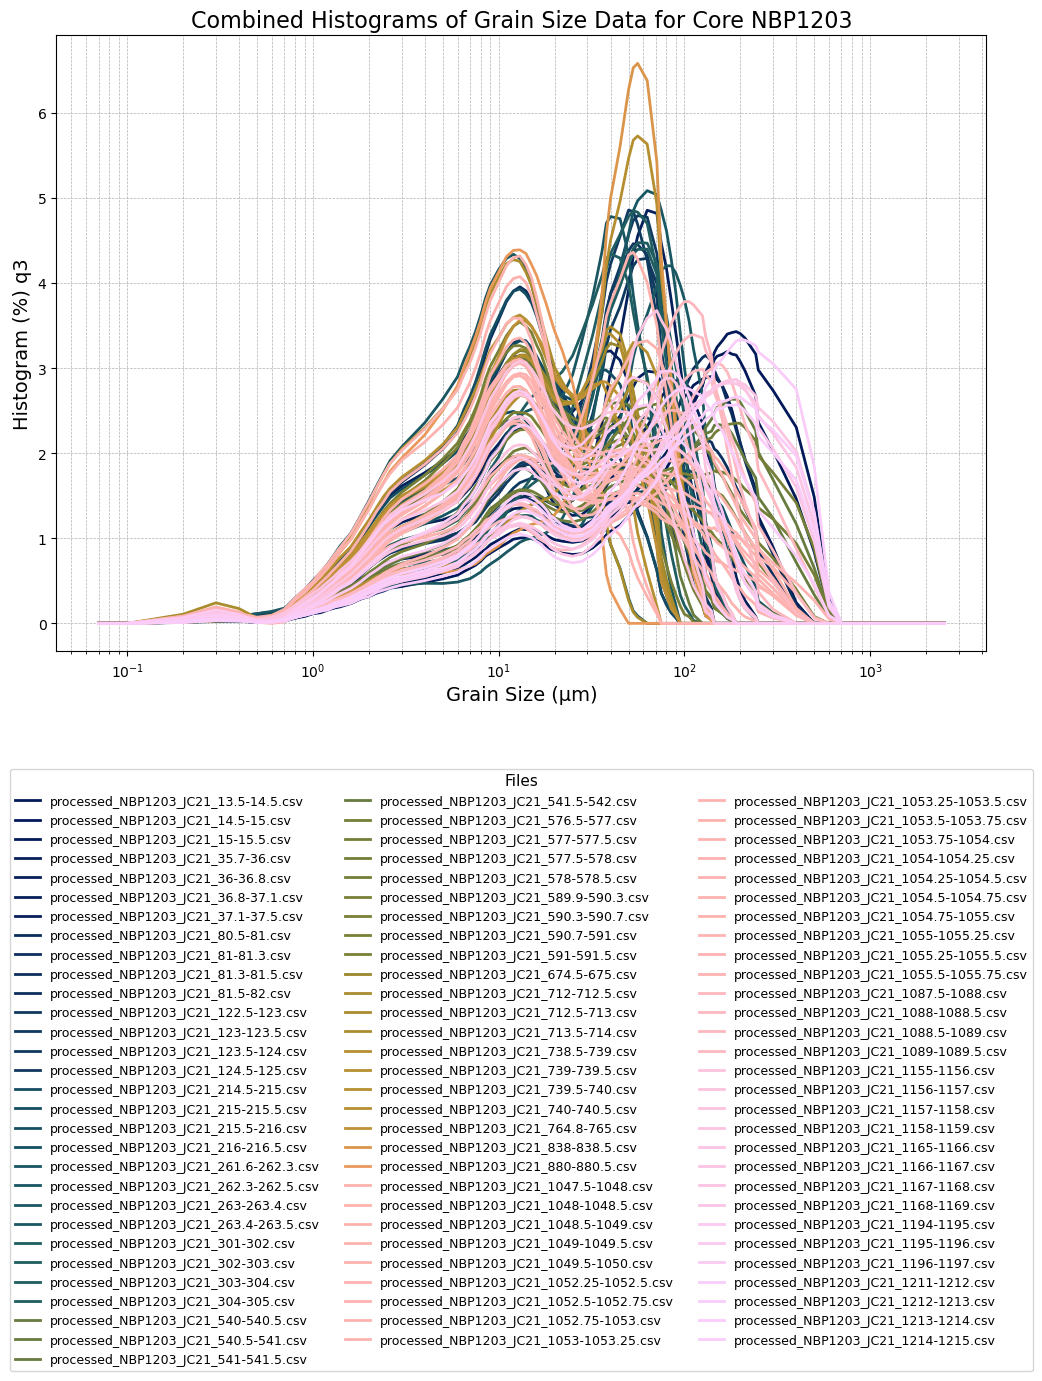

In [7]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc  # cmcrameri colormap

# --- Inputs ---
input_folder_path = input("Enter the path to the folder containing processed CSV files: ").strip()
core_name = input("Enter the core name for the title of the graph: ").strip()

# --- Helpers ---
DEPTH_RE = re.compile(r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)')

def extract_last_depth_range(fname: str):
    """
    Return (start_cm, end_cm, mid_cm) from the LAST 'a-b' numeric range in the filename.
    If none found, return (np.nan, np.nan, np.nan).
    """
    matches = DEPTH_RE.findall(fname)
    if not matches:
        return (np.nan, np.nan, np.nan)
    a, b = matches[-1]
    a = float(a); b = float(b)
    mid = 0.5 * (a + b)
    return (a, b, mid)

def sort_key_by_start_depth(fname: str):
    a, b, mid = extract_last_depth_range(fname)
    return a if np.isfinite(a) else float('inf')

# --- Collect & sort files ---
processed_files = [f for f in os.listdir(input_folder_path) if f.lower().endswith(".csv")]
processed_files.sort(key=sort_key_by_start_depth)

# --- Gather depths for color mapping ---
depth_info = []
for f in processed_files:
    a, b, mid = extract_last_depth_range(f)
    depth_info.append({'file': f, 'a': a, 'b': b, 'mid': mid})

# Filter out files with no depths found (keep order)
valid_depths = [d for d in depth_info if np.isfinite(d['mid'])]
if valid_depths:
    mids = np.array([d['mid'] for d in valid_depths])
    dmin, dmax = np.nanmin(mids), np.nanmax(mids)
    # Protect against singular range
    if dmin == dmax:
        norm = lambda x: np.full_like(x, 0.5, dtype=float)
    else:
        norm = lambda x: (np.asarray(x) - dmin) / (dmax - dmin)
else:
    dmin = dmax = np.nan
    norm = lambda x: np.zeros_like(np.asarray(x), dtype=float)

# Map each file to a color via its mid-depth
file_to_color = {}
for rec in depth_info:
    if np.isfinite(rec['mid']):
        file_to_color[rec['file']] = cmc.batlow(float(norm(rec['mid'])))
    else:
        # fallback if no depth parsed (neutral gray)
        file_to_color[rec['file']] = (0.6, 0.6, 0.6, 1.0)

# --- Plot ---
plt.figure(figsize=(12, 8))

for file_name in processed_files:
    input_file_path = os.path.join(input_folder_path, file_name)
    try:
        data = pd.read_csv(input_file_path)
    except Exception as e:
        print(f"Skipped {file_name} - read error: {e}")
        continue

    if {'um', 'Histogram (%) q3'}.issubset(data.columns):
        grain_sizes = data['um']
        histogram_q3 = data['Histogram (%) q3']
        plt.plot(
            grain_sizes,
            histogram_q3,
            linestyle='-',
            linewidth=2,
            label=file_name,
            color=file_to_color[file_name]
        )
    else:
        print(f"Skipped {file_name} - missing required columns 'um' and/or 'Histogram (%) q3'.")

# Axes / labels
plt.xscale('log')
plt.xlabel('Grain Size (µm)', fontsize=14)
plt.ylabel('Histogram (%) q3', fontsize=14)
plt.title(f'Combined Histograms of Grain Size Data for Core {core_name}', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend (below). If you have many files, consider removing legend to reduce clutter.
plt.legend(
    fontsize=9,
    title="Files",
    title_fontsize=11,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),
    ncol=3
)

# Add colorbar keyed to depth (cm)
# Build a ScalarMappable for the colorbar using the same colormap & normalization
import matplotlib as mpl
sm = mpl.cm.ScalarMappable(cmap=cmc.batlow, norm=mpl.colors.Normalize(vmin=dmin if np.isfinite(dmin) else 0,
                                                                      vmax=dmax if np.isfinite(dmax) else 1))
sm.set_array([])
cbar = plt.colorbar(sm, pad=0.015)
cbar.set_label('Mid-depth of interval (cm)', fontsize=12)

plt.tight_layout()

# Save
output_plot_path = os.path.join(input_folder_path, f"combined_histograms_core_{core_name}.png")
plt.savefig(output_plot_path, bbox_inches='tight', dpi=300)
plt.show()

print(f"Combined histogram plot for core {core_name} saved as {output_plot_path}")


# For a package within the core

Enter the path to the folder containing processed CSV files:  D:\JamieGS\processed
Enter the core name for the title of the graph:  NBP1203 JC21 1211-1215cm



Depth filter options (by TOP/START depth):
  all         -> plot all intervals
  top_range   -> start depth in [min,max] (cm)
  top_list    -> start depth matches any of a list (cm), with tolerance


Choose filter mode [all/top_range/top_list]:  top_range
Enter minimum START depth (cm):  1211
Enter maximum START depth (cm):  1214



Selected files (by TOP depth):
  processed_NBP1203_JC21_1211-1212.csv  [start=1211.0, end=1212.0, mid=1211.5]
  processed_NBP1203_JC21_1212-1213.csv  [start=1212.0, end=1213.0, mid=1212.5]
  processed_NBP1203_JC21_1213-1214.csv  [start=1213.0, end=1214.0, mid=1213.5]
  processed_NBP1203_JC21_1214-1215.csv  [start=1214.0, end=1215.0, mid=1214.5]

Actually plotted:
  processed_NBP1203_JC21_1211-1212.csv
  processed_NBP1203_JC21_1212-1213.csv
  processed_NBP1203_JC21_1213-1214.csv
  processed_NBP1203_JC21_1214-1215.csv


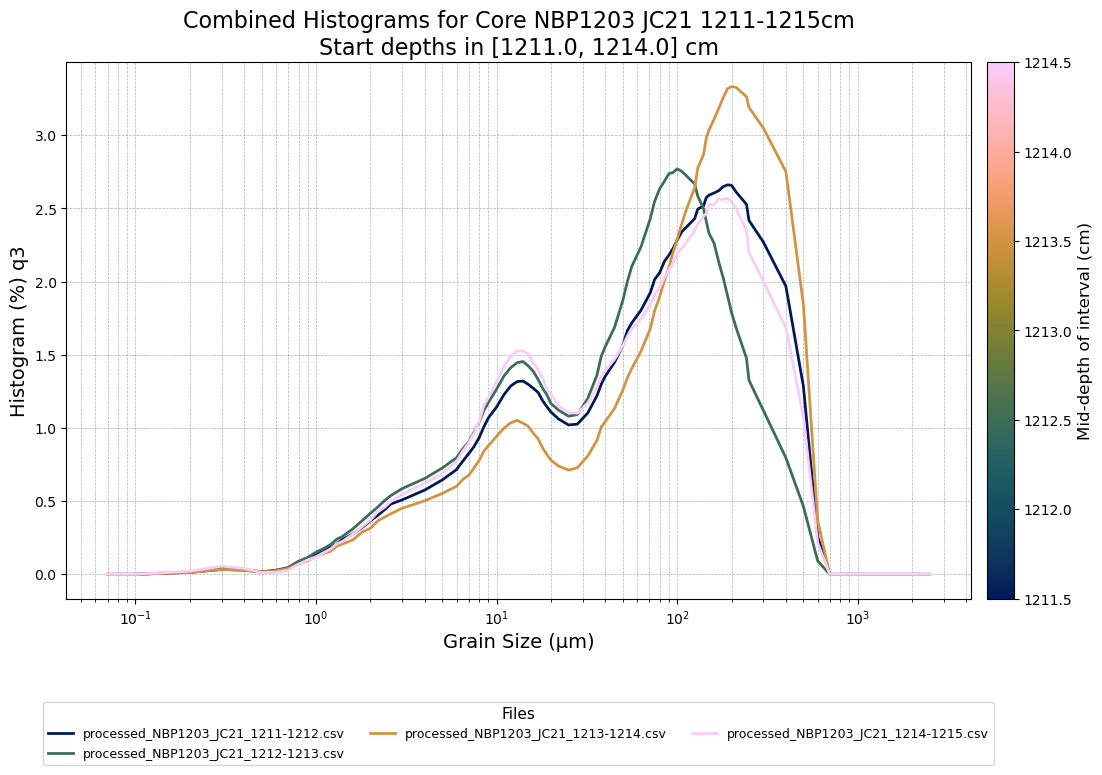


Saved: D:\JamieGS\processed\combined_histograms_core_NBP1203 JC21 1211-1215cm_top_range.png


In [5]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmcrameri.cm as cmc

# --- Inputs ---
input_folder_path = input("Enter the path to the folder containing processed CSV files: ").strip()
core_name = input("Enter the core name for the title of the graph: ").strip()

print("\nDepth filter options (by TOP/START depth):")
print("  all         -> plot all intervals")
print("  top_range   -> start depth in [min,max] (cm)")
print("  top_list    -> start depth matches any of a list (cm), with tolerance")
depth_mode = (input("Choose filter mode [all/top_range/top_list]: ").strip().lower() or "all")

min_cm = max_cm = None
top_values = []
top_tol = 0.02  # cm

if depth_mode == "top_range":
    min_cm = float(input("Enter minimum START depth (cm): ").strip())
    max_cm = float(input("Enter maximum START depth (cm): ").strip())
elif depth_mode == "top_list":
    raw = input("Enter comma-separated START depths (cm), e.g., 13.5,14.5,15: ").strip()
    top_values = [float(x) for x in raw.split(",") if x.strip()]
    tol_in = input(f"Tolerance in cm [default {top_tol}]: ").strip()
    if tol_in:
        top_tol = float(tol_in)

# --- Helpers ---
# Matches decimal ranges like 13.5-14.5 anywhere in the filename
DEPTH_RE = re.compile(r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)')

def extract_last_depth_range(fname: str):
    """
    Return (start_cm, end_cm, mid_cm) from the LAST 'a-b' numeric range in the *basename*.
    If none found, return (np.nan, np.nan, np.nan).
    """
    base = os.path.basename(fname)
    matches = DEPTH_RE.findall(base)
    if not matches:
        return (np.nan, np.nan, np.nan)
    a, b = matches[-1]
    a = float(a); b = float(b)
    if a > b: a, b = b, a
    mid = 0.5 * (a + b)
    return (a, b, mid)

def keep_by_top(a: float) -> bool:
    if not np.isfinite(a):
        return False
    if depth_mode == "all":
        return True
    if depth_mode == "top_range":
        return (min_cm <= a <= max_cm)
    if depth_mode == "top_list":
        return any(abs(a - v) <= top_tol for v in top_values)
    return True

def sort_key_by_start_depth(fname: str):
    a, b, mid = extract_last_depth_range(fname)
    return a if np.isfinite(a) else float('inf')

# --- Collect CSVs ---
all_csvs = [f for f in os.listdir(input_folder_path) if f.lower().endswith(".csv")]
all_csvs.sort(key=sort_key_by_start_depth)

# Attach depths
meta = []
for f in all_csvs:
    a, b, mid = extract_last_depth_range(f)
    meta.append({"file": f, "a": a, "b": b, "mid": mid})

# Filter by TOP depth
selected = [m for m in meta if keep_by_top(m["a"])]

# Debug print
print("\nSelected files (by TOP depth):")
for m in selected:
    print(f"  {m['file']}  [start={m['a']}, end={m['b']}, mid={m['mid']}]")

if not selected:
    raise SystemExit("No files matched your START-depth selection.")

# Color mapping by mid-depth of selected
mids = np.array([m["mid"] for m in selected if np.isfinite(m["mid"])])
if mids.size:
    dmin, dmax = float(np.nanmin(mids)), float(np.nanmax(mids))
    if dmin == dmax:
        norm = mpl.colors.Normalize(vmin=dmin - 0.5, vmax=dmax + 0.5)
    else:
        norm = mpl.colors.Normalize(vmin=dmin, vmax=dmax)
else:
    # Fallback
    dmin, dmax = 0.0, 1.0
    norm = mpl.colors.Normalize(vmin=dmin, vmax=dmax)

cmap = cmc.batlow
file_to_color = {
    m["file"]: (cmap(norm(m["mid"])) if np.isfinite(m["mid"]) else (0.6, 0.6, 0.6, 1.0))
    for m in selected
}

# --- Plot ---
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

plotted_any = False
plotted_files = []

for m in selected:
    file_name = m["file"]
    input_file_path = os.path.join(input_folder_path, file_name)

    try:
        data = pd.read_csv(input_file_path)
    except Exception as e:
        print(f"Skipped {file_name} - read error: {e}")
        continue

    if {'um', 'Histogram (%) q3'}.issubset(data.columns):
        ax.plot(
            data['um'],
            data['Histogram (%) q3'],
            linestyle='-',
            linewidth=2,
            label=file_name,
            color=file_to_color[file_name]
        )
        plotted_any = True
        plotted_files.append(file_name)
    else:
        print(f"Skipped {file_name} - missing required columns 'um' and/or 'Histogram (%) q3'.")

# More debug print
print("\nActually plotted:")
for f in plotted_files:
    print(f"  {f}")
if not plotted_any:
    raise SystemExit("No selected files had the required columns; nothing was plotted.")

# Axes / labels
ax.set_xscale('log')
ax.set_xlabel('Grain Size (µm)', fontsize=14)
ax.set_ylabel('Histogram (%) q3', fontsize=14)

if depth_mode == "top_range":
    filter_note = f"Start depths in [{min_cm}, {max_cm}] cm"
elif depth_mode == "top_list":
    filter_note = f"Start depths in {top_values} ± {top_tol} cm"
else:
    filter_note = "All intervals"

ax.set_title(f'Combined Histograms for Core {core_name}\n{filter_note}', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(
    fontsize=9,
    title="Files",
    title_fontsize=11,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),
    ncol=3
)

# Safe colorbar (attach to existing ax)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.015)
cbar.set_label('Mid-depth of interval (cm)', fontsize=12)

plt.tight_layout()

# Save
suffix = depth_mode.replace(" ", "_")
out_png = os.path.join(input_folder_path, f"combined_histograms_core_{core_name}_{suffix}.png")
plt.savefig(out_png, bbox_inches='tight', dpi=300)
plt.show()

print(f"\nSaved: {out_png}")


Folder with processed CSVs:  D:\JamieGS\processed
Title for plot (e.g., 'NBP1203 JC21 1055-1055.75cm'):  NBP1203 JC21 738.5-740.5cm
Optional filename filter (e.g., 'NBP1203_JC21'); press Enter to skip:  



Depth filter (TOP/START depth):
  all         -> plot all intervals
  top_range   -> start depth in [min,max] (cm)
  top_list    -> start depth matches any of a list (cm), with tolerance


Enter mode, or directly enter values ('13.5-15' or '13.5,14.5,15'):  738.5-740.5



Selected files:
  processed_NBP1203_JC21_738.5-739.csv  [start=738.5, end=739.0, mid=738.75]
  processed_NBP1203_JC21_739-739.5.csv  [start=739.0, end=739.5, mid=739.25]
  processed_NBP1203_JC21_739.5-740.csv  [start=739.5, end=740.0, mid=739.75]
  processed_NBP1203_JC21_740-740.5.csv  [start=740.0, end=740.5, mid=740.25]

Saved table: D:\JamieGS\processed\percentile_grainsizes_NBP1203 JC21 738.5-740.5cm.csv


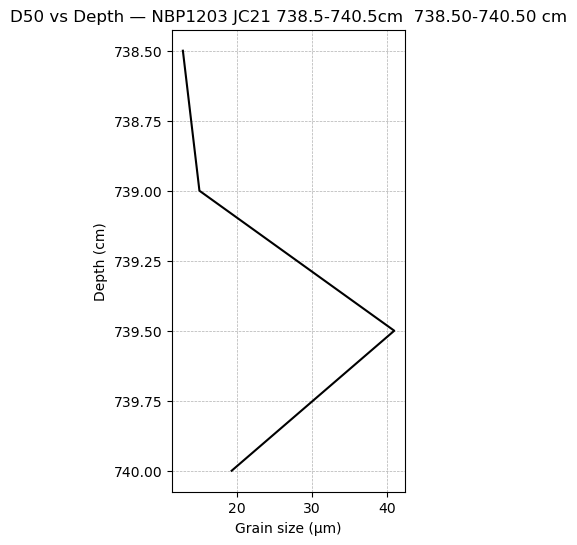

Saved D50 plot: D:\JamieGS\processed\D50_vs_depth_NBP1203 JC21 738.5-740.5cm.png


In [19]:
# === One-shot: select files fresh, compute percentiles, and plot ONLY D50 vs depth ===
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter

plt.close('all')  # ensure no old figure

# ---------- Inputs ----------
input_folder_path = input("Folder with processed CSVs: ").strip()
core_name = input("Title for plot (e.g., 'NBP1203 JC21 1055-1055.75cm'): ").strip()
name_filter = input("Optional filename filter (e.g., 'NBP1203_JC21'); press Enter to skip: ").strip()

print("\nDepth filter (TOP/START depth):")
print("  all         -> plot all intervals")
print("  top_range   -> start depth in [min,max] (cm)")
print("  top_list    -> start depth matches any of a list (cm), with tolerance")
mode_raw = input("Enter mode, or directly enter values ('13.5-15' or '13.5,14.5,15'): ").strip().lower()

depth_mode = "all"
min_cm = max_cm = None
top_values = []
top_tol = 0.02  # cm

def _try_float_list(s):
    vals = []
    for x in s.split(","):
        x = x.strip()
        if x:
            vals.append(float(x))
    return vals

if mode_raw in {"all", "top_range", "top_list"}:
    depth_mode = mode_raw
    if depth_mode == "top_range":
        min_cm = float(input("Min START depth (cm): ").strip())
        max_cm = float(input("Max START depth (cm): ").strip())
    elif depth_mode == "top_list":
        raw = input("Comma-separated START depths (cm): ").strip()
        top_values = _try_float_list(raw)
        tol_in = input(f"Tolerance in cm [default {top_tol}]: ").strip()
        if tol_in: top_tol = float(tol_in)
else:
    # Forgiving input: "a-b" or "a,b,c"
    if "-" in mode_raw:
        a, b = [float(t) for t in mode_raw.split("-")]
        min_cm, max_cm = (min(a,b), max(a,b))
        depth_mode = "top_range"
    elif "," in mode_raw:
        top_values = _try_float_list(mode_raw)
        depth_mode = "top_list"
    else:
        depth_mode = "all"

# ---------- Helpers ----------
DEPTH_RE = re.compile(r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)')

def extract_last_depth_range(fname: str):
    base = os.path.basename(fname)
    m = DEPTH_RE.findall(base)
    if not m:
        return (np.nan, np.nan, np.nan)
    a, b = m[-1]
    a = float(a); b = float(b)
    if a > b: a, b = b, a
    return (a, b, 0.5*(a+b))

def keep_by_top(a):
    if not np.isfinite(a):
        return False
    if depth_mode == "all":
        return True
    if depth_mode == "top_range":
        return (min_cm <= a <= max_cm)
    if depth_mode == "top_list":
        return any(abs(a - v) <= top_tol for v in top_values)
    return True

def csvs_in_folder(folder, name_filter=None):
    files = [f for f in os.listdir(folder) if f.lower().endswith(".csv")]
    if name_filter:
        files = [f for f in files if name_filter in f]
    return sorted(files)

# ---------- Collect & select ----------
all_csvs = csvs_in_folder(input_folder_path, name_filter=name_filter)
meta = []
for f in all_csvs:
    a,b,mid = extract_last_depth_range(f)
    meta.append({"file": f, "a": a, "b": b, "mid": mid})
meta.sort(key=lambda m: (np.inf if not np.isfinite(m["a"]) else m["a"], m["file"]))

selected = [m for m in meta if keep_by_top(m["a"])]

print("\nSelected files:")
for m in selected:
    print(f"  {m['file']}  [start={m['a']}, end={m['b']}, mid={m['mid']}]")

if not selected:
    raise SystemExit("No files matched your selection. Check name_filter/depth values.")

# ---------- Compute D30/D50/D90 (fresh each run) ----------
results = []
for m in selected:
    path = os.path.join(input_folder_path, m["file"])
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"Skipped {m['file']} (read error): {e}")
        continue

    if not {'um','Histogram (%) q3'}.issubset(df.columns):
        print(f"Skipped {m['file']} (missing columns).")
        continue

    sz = pd.to_numeric(df['um'], errors='coerce').to_numpy()
    fq = pd.to_numeric(df['Histogram (%) q3'], errors='coerce').to_numpy()
    ok = np.isfinite(sz) & np.isfinite(fq) & (fq >= 0)
    sz, fq = sz[ok], fq[ok]
    if sz.size == 0 or fq.sum() <= 0:
        print(f"Skipped {m['file']} (empty/invalid data).")
        continue

    order = np.argsort(sz)
    sz, fq = sz[order], fq[order]

    cdf = np.cumsum(fq); cdf = cdf / cdf[-1] * 100.0
    D30 = float(np.interp(30, cdf, sz))
    D50 = float(np.interp(50, cdf, sz))
    D90 = float(np.interp(90, cdf, sz))

    results.append({
        "file": m["file"],
        "start_depth_cm": float(m["a"]),
        "end_depth_cm": float(m["b"]),
        "mid_depth_cm": float(m["mid"]),
        "D30_um": D30, "D50_um": D50, "D90_um": D90
    })

df_D = pd.DataFrame(results).sort_values(["start_depth_cm","end_depth_cm"]).reset_index(drop=True)
if df_D.empty:
    raise SystemExit("No percentile results computed — check selection/CSVs.")

# Save CSV (current selection only)
csv_path = os.path.join(input_folder_path, f"percentile_grainsizes_{core_name}.csv")
df_D.to_csv(csv_path, index=False)
print(f"\nSaved table: {csv_path}")

# ---------- Plot ONLY D50 vs depth (absolute labels, no sci offset) ----------
y = df_D["start_depth_cm"].to_numpy()  # or df_D["mid_depth_cm"]
x = df_D["D50_um"].to_numpy()

fig, ax = plt.subplots(figsize=(3,6))
ax.plot(x, y, linestyle="-", color="black")
ax.invert_yaxis()

sf = ScalarFormatter(useOffset=False); sf.set_scientific(False)
ax.yaxis.set_major_formatter(sf)
step = 0.25 if (np.nanmax(y)-np.nanmin(y)) <= 2.0 else 1.0
ax.yaxis.set_major_locator(MultipleLocator(step))

ax.set_xlabel("Grain size (µm)")
ax.set_ylabel("Depth (cm)")
dmin = float(df_D["start_depth_cm"].min())
dmax = float(df_D["end_depth_cm"].max())
ax.set_title(f"D50 vs Depth — {core_name}  {dmin:.2f}-{dmax:.2f} cm")
ax.grid(True, linestyle="--", linewidth=0.5)

png_path = os.path.join(input_folder_path, f"D50_vs_depth_{core_name}.png")
plt.savefig(png_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"Saved D50 plot: {png_path}")